### Trabalho de Conclusão de Curso
### Pós Graduação Ciência de Dados e Inteligência Artificial - PUCRS

### UTILIZANDO TÉCNICAS DE MACHINE LEARNING NA PRECIFICAÇÃO DE TARIFAS DE ARRECADAÇÃO TRIBUTÁRIA NO BRASIL

### Michel Dourado

### Parte 2 - Análise Exploratória

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.10.9


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
#!pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports
#import pyspark
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x : '%.2f' % x)
%matplotlib inline

In [4]:
# Formatação das saídas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michel Dourado" --iversions

Author: Michel Dourado

pandas    : 1.5.3
numpy     : 1.23.5
seaborn   : 0.12.2
matplotlib: 3.7.0



## Análise Exploratória

In [6]:
df_pd_consolid = pd.read_csv('df_pd_consolid_vf.csv')


In [7]:
#verificando quantidade de linhas e colunas
df_pd_consolid.shape

(3404, 9)

In [8]:
#removendo valores duplicados
df_pd_consolid.drop_duplicates(inplace=True)

In [9]:
#verificando se houve alteração na quantidade de linhas
df_pd_consolid.shape

(3404, 9)

In [10]:
df_pd_consolid.columns

Index(['ID', 'Cod_Tipo_Cart_Rel', 'UF', 'Esfera', 'Media_de_quantidade',
       'Media_de_volume', 'Media_de_tarifas', 'Media_de_margem',
       'Tarifa_media'],
      dtype='object')

In [11]:
df_pd_consolid.rename(columns={'Media_de_quantidade':'Quantidade_media_guias',
                               'Media_de_volume':'Volume_medio_arrecadado', 
                               'Media_de_tarifas':'Volume_medio_tarifas', 
                               'Media_de_margem': 'Margem_contribuicao_media'}, 
                      inplace = True)

In [12]:
df_pd_consolid.head()

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
0,800809325,406,MA,MUNICIPAL,265.00,0.00,17757.00,0.00,370.91
1,35086758,403,PB,ESTADUAL,285.00,233.50,21099.00,0.00,88.23
2,106229821,403,MT,ESTADUAL,42224.00,120169566.50,2084178.50,0.00,58.21
3,204823794,406,SP,MUNICIPAL,699.75,1113.25,1673.25,22.50,23.30
4,200964047,400,SP,ESTADUAL,46241.75,263002381.00,787680.75,109422.00,22.31


In [13]:
df_pd_consolid.tail()

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
3399,600851455,406,MG,MUNICIPAL,15474.00,67044.50,202.00,0.00,0.02
3400,800401140,406,BA,MUNICIPAL,3767.50,54.50,48.00,15.50,0.02
3401,200371171,406,SP,MUNICIPAL,22139.75,151917.50,232.50,0.00,0.01
3402,500203700,406,CE,MUNICIPAL,1781.00,132.00,12.00,0.00,0.01
3403,933241298,406,ES,MUNICIPAL,15240.75,23198.50,154.25,41.00,0.01


In [14]:
# Resumo
print("Linhas: ", df_pd_consolid.shape[0])
print("Colunas: ", df_pd_consolid.shape[1])
print("\nVariáveis: \n", df_pd_consolid.columns.tolist())
print("\nValores Ausentes: \n" , df_pd_consolid.isnull().sum())
print("\nValores Únicos: \n", df_pd_consolid.nunique())

Linhas:  3404
Colunas:  9

Variáveis: 
 ['ID', 'Cod_Tipo_Cart_Rel', 'UF', 'Esfera', 'Quantidade_media_guias', 'Volume_medio_arrecadado', 'Volume_medio_tarifas', 'Margem_contribuicao_media', 'Tarifa_media']

Valores Ausentes: 
 ID                           0
Cod_Tipo_Cart_Rel            0
UF                           0
Esfera                       0
Quantidade_media_guias       0
Volume_medio_arrecadado      0
Volume_medio_tarifas         0
Margem_contribuicao_media    0
Tarifa_media                 0
dtype: int64

Valores Únicos: 
 ID                           3404
Cod_Tipo_Cart_Rel               7
UF                             27
Esfera                          2
Quantidade_media_guias       3063
Volume_medio_arrecadado      2965
Volume_medio_tarifas         2825
Margem_contribuicao_media     849
Tarifa_media                  352
dtype: int64


In [15]:
df_pd_consolid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3404 entries, 0 to 3403
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3404 non-null   int64  
 1   Cod_Tipo_Cart_Rel          3404 non-null   int64  
 2   UF                         3404 non-null   object 
 3   Esfera                     3404 non-null   object 
 4   Quantidade_media_guias     3404 non-null   float64
 5   Volume_medio_arrecadado    3404 non-null   float64
 6   Volume_medio_tarifas       3404 non-null   float64
 7   Margem_contribuicao_media  3404 non-null   float64
 8   Tarifa_media               3404 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 265.9+ KB


In [17]:
# transformando tipos das variáveis
df_pd_consolid.ID                      = df_pd_consolid.ID.astype('object')
df_pd_consolid.Cod_Tipo_Cart_Rel         = df_pd_consolid.Cod_Tipo_Cart_Rel.astype('object')
df_pd_consolid.Quantidade_media_guias    = df_pd_consolid.Quantidade_media_guias.astype('int64')
df_pd_consolid.Volume_medio_arrecadado   = df_pd_consolid.Volume_medio_arrecadado.astype('float64')
df_pd_consolid.Volume_medio_tarifas      = df_pd_consolid.Volume_medio_tarifas .astype('float64')
df_pd_consolid.Margem_contribuicao_media = df_pd_consolid.Margem_contribuicao_media.astype('float64')
df_pd_consolid.Tarifa_media               = df_pd_consolid.Tarifa_media.astype('float64')

In [18]:
#verificando dados após as transformações
df_pd_consolid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3404 entries, 0 to 3403
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         3404 non-null   object 
 1   Cod_Tipo_Cart_Rel          3404 non-null   object 
 2   UF                         3404 non-null   object 
 3   Esfera                     3404 non-null   object 
 4   Quantidade_media_guias     3404 non-null   int64  
 5   Volume_medio_arrecadado    3404 non-null   float64
 6   Volume_medio_tarifas       3404 non-null   float64
 7   Margem_contribuicao_media  3404 non-null   float64
 8   Tarifa_media               3404 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 265.9+ KB


In [19]:
df_pd_consolid.describe()
#Não verificamos a existência de tarifas zeradas e nem negativas, todas as colunas apresentam a quantidade de 3404 registros

,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
count,3404.00,3404.00,3404.00,3404.00,3404.00
mean,4762.13,256219.52,5943.29,347.68,1.13
std,8494.32,5303849.52,50627.19,4259.87,6.72
min,1.00,0.00,1.00,-169.25,0.01
25%,537.25,1344.00,320.00,0.00,0.41
50%,1604.00,7394.75,958.50,0.00,0.75
75%,5322.50,26199.40,2703.79,23.75,1.17
max,214686.00,263002381.00,2084178.50,171431.00,370.91


In [20]:
#Verificando se existem outliers referente a tarifas muita acima da média, acima de 3 desvios padrão, pois representam
#alguma distorção nos dados, logo, deverão ser excluídos para não influenciar no modelo a ser construido.

outlier = df_pd_consolid.Tarifa_media.std() * 3
df_pd_consolid[df_pd_consolid.Tarifa_media >= outlier]

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
0,800809325,406,MA,MUNICIPAL,265,0.00,17757.00,0.00,370.91
1,35086758,403,PB,ESTADUAL,285,233.50,21099.00,0.00,88.23
2,106229821,403,MT,ESTADUAL,42224,120169566.50,2084178.50,0.00,58.21
3,204823794,406,SP,MUNICIPAL,699,1113.25,1673.25,22.50,23.30
4,200964047,400,SP,ESTADUAL,46241,263002381.00,787680.75,109422.00,22.31
5,104839035,405,MA,ESTADUAL,11296,139517.75,226903.75,0.00,21.08
6,501466442,403,PE,ESTADUAL,14037,1128944.80,297443.40,60106.20,20.42


In [21]:
#quantidade de registros de tarifas outliers
len(df_pd_consolid[df_pd_consolid.Tarifa_media >= outlier])

7

In [22]:
len(df_pd_consolid[df_pd_consolid.Tarifa_media < outlier])

3397

In [23]:
df_pd_consolid = df_pd_consolid[df_pd_consolid.Tarifa_media < outlier]

In [24]:
df_pd_consolid.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
count,3397.00,3397.00,3397.00,3397.00,3397.00
mean,4738.08,143576.53,4943.84,298.48,0.95
std,8445.54,1900835.87,32804.34,3691.40,1.13
min,1.00,0.00,1.00,-169.25,0.01
25%,538.00,1346.50,319.00,0.00,0.41
50%,1603.00,7394.00,957.33,0.00,0.75
75%,5304.00,26079.50,2683.67,23.67,1.16
max,214686.00,69478165.00,1520186.00,171431.00,20.00


In [25]:
#como a tarifa máxima ainda ficou alta, pois, a tarifa máxima praticada é de R$ 4,60 adotamos qualquer valor acima desse valor 
#como outlier para eliminar esses registros inconsistentes.
outlier = 4.6

In [26]:
len(df_pd_consolid[df_pd_consolid.Tarifa_media > outlier])

32

In [27]:
len(df_pd_consolid[df_pd_consolid.Tarifa_media <= outlier])

3365

In [28]:
df_pd_consolid = df_pd_consolid[df_pd_consolid.Tarifa_media <= outlier]

In [29]:
df_pd_consolid.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
count,3365.00,3365.00,3365.00,3365.00,3365.00
mean,4651.95,108050.80,3613.55,248.31,0.87
std,8267.27,1493069.54,14352.32,2244.71,0.66
min,1.00,0.00,1.00,-169.25,0.01
25%,538.00,1385.00,319.00,0.00,0.40
50%,1588.00,7395.50,952.00,0.00,0.74
75%,5199.00,25976.33,2637.50,24.50,1.15
max,214686.00,69478165.00,609748.00,82006.00,4.60


In [30]:
len(df_pd_consolid[df_pd_consolid.Margem_contribuicao_media < 0])

5

In [31]:
df_pd_consolid[df_pd_consolid.Margem_contribuicao_media < 0]

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
2385,204636717,406,PR,MUNICIPAL,4030,8460.00,1906.00,-20.00,0.47
2766,204639756,406,SC,MUNICIPAL,7521,44437.00,2732.50,-169.25,0.33
3022,906097313,407,MG,MUNICIPAL,1210,7365.00,313.67,-8.67,0.23
3250,910587290,407,MG,MUNICIPAL,1518,0.00,184.00,-24.00,0.12
3270,1343304,406,PR,MUNICIPAL,3202,398.00,310.50,-39.00,0.10


In [32]:
df_pd_consolid=df_pd_consolid[df_pd_consolid.Margem_contribuicao_media >= 0]

In [33]:
df_pd_consolid.describe()

,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
count,3360.00,3360.00,3360.00,3360.00,3360.00
mean,4653.67,108193.53,3617.31,248.76,0.87
std,8272.84,1494175.65,14362.61,2246.35,0.66
min,1.00,0.00,1.00,0.00,0.01
25%,537.25,1385.00,320.00,0.00,0.41
50%,1587.50,7396.09,953.25,0.00,0.74
75%,5200.25,25980.25,2637.62,25.25,1.15
max,214686.00,69478165.00,609748.00,82006.00,4.60


In [34]:
#calculando tarifa média por UF
df_pd_consolid[['UF','Tarifa_media']].groupby('UF').mean().round(2).sort_values(by='Tarifa_media', ascending = False)

,Tarifa_media
UF,
DF,3.20
AP,1.44
RR,1.20
PI,1.20
MA,1.08
AL,1.07
PA,1.03
RN,1.00
TO,1.00


In [35]:
df_pd_consolid.columns

Index(['ID', 'Cod_Tipo_Cart_Rel', 'UF', 'Esfera', 'Quantidade_media_guias',
       'Volume_medio_arrecadado', 'Volume_medio_tarifas',
       'Margem_contribuicao_media', 'Tarifa_media'],
      dtype='object')

In [36]:
# Colunas numéricas (quantitativas)
num_cols = ['Quantidade_media_guias','Volume_medio_arrecadado','Volume_medio_tarifas','Margem_contribuicao_media','Tarifa_media']

In [37]:
# Colunas categóricas
cat_cols = ['ID','Cod_Tipo_Cart_Rel','UF','Esfera']

In [38]:
# Verifica se o total de variáveis está coberto nos objetos anteriores
len(num_cols) + len(cat_cols) == 9

True

In [39]:
# Dataframes com os tipos diferentes de variáveis
df_num = df_pd_consolid[num_cols]
df_cat = df_pd_consolid[cat_cols]

In [40]:
# Sumário estatístico das variáveis numéricas
summ_num = pd.DataFrame(index = df_num.columns)
summ_num['Tipo de Dado'] = df_num.dtypes.values
summ_num['# Registros Não Nulos'] = df_num.count().values
summ_num['# Registros Não Zero'] = df_num.astype(bool).sum(axis = 0)
summ_num['% Populado'] = summ_num['# Registros Não Nulos'] / df_num.shape[0]*100
summ_num['# Valores Únicos'] = df_num.nunique().values
summ_num['Mean'] = df_num.mean()
summ_num['Std'] = df_num.std()
summ_num['Min'] = df_num.min()
summ_num['Max'] = df_num.max()
summ_num

,Tipo de Dado,# Registros Não Nulos,# Registros Não Zero,% Populado,# Valores Únicos,Mean,Std,Min,Max
Quantidade_media_guias,int64,3360,3360,100.00,2526,4653.67,8272.84,1.00,214686.00
Volume_medio_arrecadado,float64,3360,3028,100.00,2934,108193.53,1494175.65,0.00,69478165.00
Volume_medio_tarifas,float64,3360,3360,100.00,2791,3617.31,14362.61,1.00,609748.00
Margem_contribuicao_media,float64,3360,971,100.00,837,248.76,2246.35,0.00,82006.00
Tarifa_media,float64,3360,3360,100.00,315,0.87,0.66,0.01,4.60


In [41]:
# Sumário estatístico das variáveis categóricas
summ_cat = pd.DataFrame(index = df_cat.columns)
summ_cat['Tipo de Dado'] = df_cat.dtypes.values
summ_cat['# Registros Não Nulos'] = df_cat.count().values
summ_cat['% Populado'] = summ_cat['# Registros Não Nulos'] / df_cat.shape[0]*100
summ_cat['# Valores Únicos'] = df_cat.nunique().values

# Adiciona mais uma coluna com valores mais comuns
temp = []
for col in cat_cols:
    temp.append(df_cat[col].value_counts().idxmax())
summ_cat['Valores Mais Comuns'] = temp

summ_cat

,Tipo de Dado,# Registros Não Nulos,% Populado,# Valores Únicos,Valores Mais Comuns
ID,object,3360,100.00,3360,104361900
Cod_Tipo_Cart_Rel,object,3360,100.00,7,406
UF,object,3360,100.00,27,MG
Esfera,object,3360,100.00,2,MUNICIPAL


In [42]:
df_pd_consolid.head()

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
39,104361900,406,CE,MUNICIPAL,10,96.00,46.00,0.00,4.60
40,104840564,407,MG,MUNICIPAL,5,0.00,23.00,0.00,4.60
41,909389167,405,AP,MUNICIPAL,2,0.00,9.00,0.00,4.50
42,600390519,406,MG,MUNICIPAL,34773,232222.75,140700.25,0.00,4.44
43,800472769,406,BA,MUNICIPAL,4685,2593.50,15344.00,403.50,4.36


In [43]:
df_pd_consolid.tail()

,ID,Cod_Tipo_Cart_Rel,UF,Esfera,Quantidade_media_guias,Volume_medio_arrecadado,Volume_medio_tarifas,Margem_contribuicao_media,Tarifa_media
3399,600851455,406,MG,MUNICIPAL,15474,67044.50,202.00,0.00,0.02
3400,800401140,406,BA,MUNICIPAL,3767,54.50,48.00,15.50,0.02
3401,200371171,406,SP,MUNICIPAL,22139,151917.50,232.50,0.00,0.01
3402,500203700,406,CE,MUNICIPAL,1781,132.00,12.00,0.00,0.01
3403,933241298,406,ES,MUNICIPAL,15240,23198.50,154.25,41.00,0.01


**Variável 1** \
Nome da Variável: ID \
Descrição: código do cliente

**Variável 2** \
Nome da Variável: Cod_Tipo_Cart_Rel \
Descrição: Códigos de tipos de carteiras de cliente \
406 - S. PUB. PLATAFORMA \
407 - S. PUBLICO DIGITAL \
405 - SETOR PUBLICO III \
403 - SETOR PUBLICO II \
420 - USUARIOS \
410 - INFORMATIVA \
400 - SETOR PUBLICO I

In [45]:
# Contagem
tipo_cart = df_pd_consolid['Cod_Tipo_Cart_Rel'].value_counts().rename_axis('Cod_Tipo_Cart_Rel').reset_index(name = 'Registros')
tipo_cart

,Cod_Tipo_Cart_Rel,Registros
0,406,1616
1,407,1373
2,405,329
3,403,33
4,420,4
5,410,3
6,400,2


**Variável 3** 
Nome da Variável: UF \
Descrição: Estado do cliente 

Text(0.5, 1.0, 'Quantidade de registros por UF')

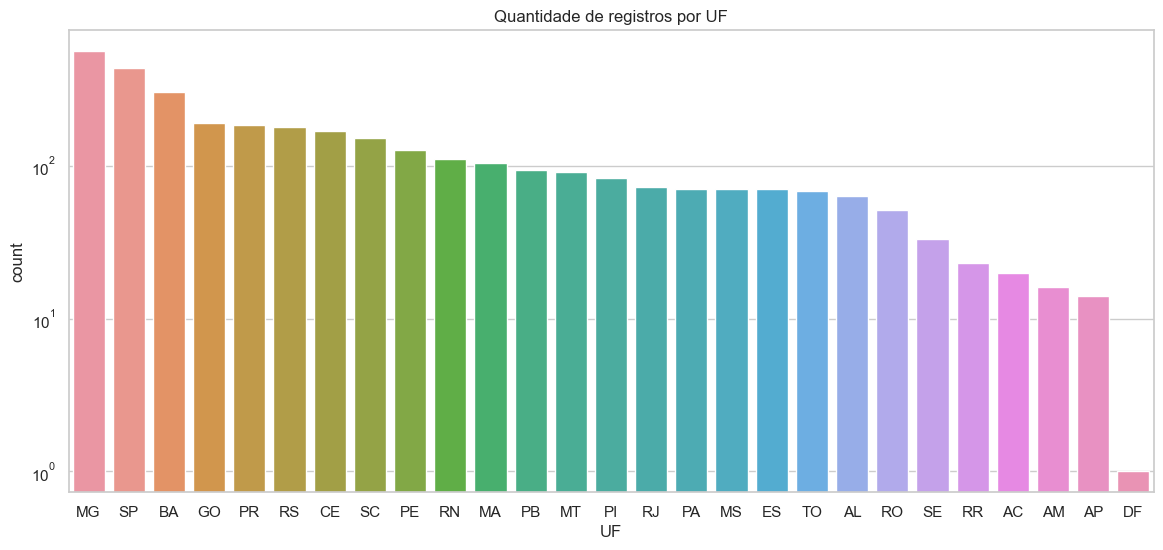

In [46]:
# Visualização da variável 3
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig1 = sns.countplot(x = 'UF', data = df_pd_consolid, order = df_pd_consolid['UF'].value_counts().index)
fig1.set_yscale("log")
fig1.set_title('Quantidade de registros por UF')

In [ ]:
# O gráfico mostra os Estados com maior quantidade de clientes com movimento de arrecadação acumulado ao longo do período.

**Variável 4** \
Nome da Variável: Esfera \
Descrição: Classificação do cliente por tipo de ente público vinculado 

In [47]:
# Contagem
Esfera = df_pd_consolid['Esfera'].value_counts().rename_axis('Esfera').reset_index(name = 'Registros')
Esfera

,Esfera,Registros
0,MUNICIPAL,3302
1,ESTADUAL,58


**Variável 5** \
Nome da Variável: Quantidade_guias \
Descrição: quantidade de guias arrecadas por cliente

In [48]:
# Divide em percentis
df_pd_consolid['Quantidade_media_guias'].describe(percentiles = [0.5,0.75,0.995])

count     3360.00
mean      4653.67
std       8272.84
min          1.00
50%       1587.50
75%       5200.25
99.5%    34416.04
max     214686.00
Name: Quantidade_media_guias, dtype: float64

In [49]:
# Filtra por valores iguais ou menores que 34416.04
tmp = df_pd_consolid[df_pd_consolid['Quantidade_media_guias'] <= 34416.04]

Text(0.5, 1.0, 'Histograma da Variável Quantidade_media_guias')

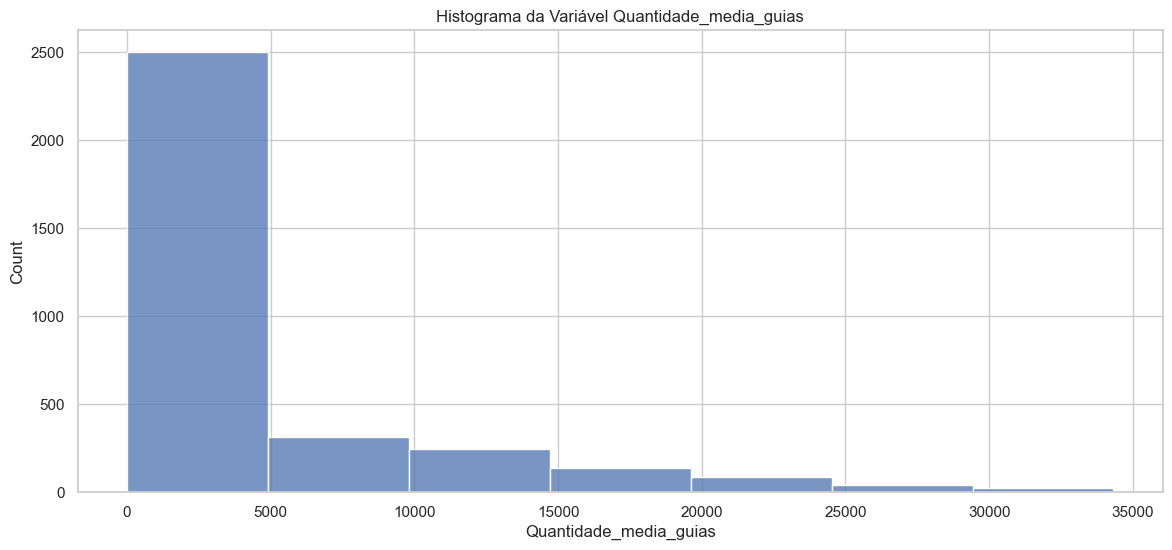

In [50]:
# Visualização da variável 5
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig2 = sns.histplot(tmp.Quantidade_media_guias, bins = 7)
fig2.set_title('Histograma da Variável Quantidade_media_guias')

Text(0.5, 1.0, 'Quantidade média de guias por Tipo de Carteira')

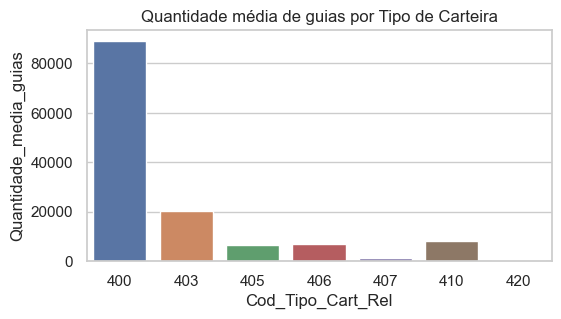

In [51]:
#quantidade_guias por tipo_cart
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 3))
fig3 = sns.barplot(data=df_pd_consolid, x="Cod_Tipo_Cart_Rel", y="Quantidade_media_guias", errorbar=None)
fig3.set_title('Quantidade média de guias por Tipo de Carteira')

Text(0.5, 1.0, 'Quantidade média de guias por UF')

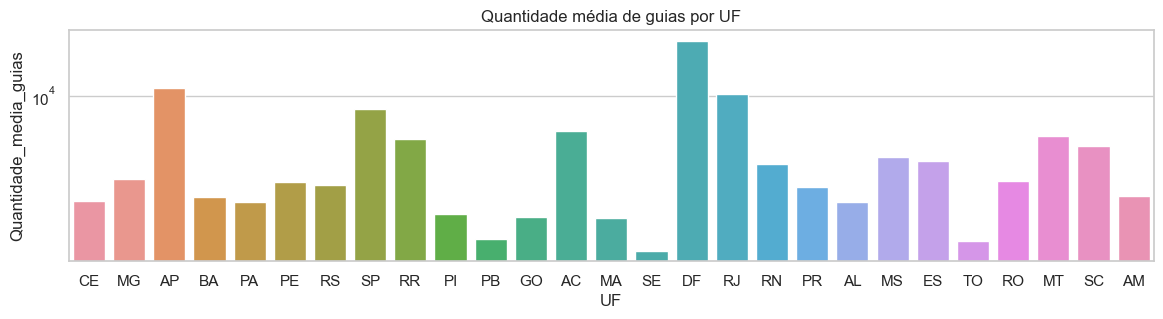

In [59]:
#quantidade_guias por UF
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 3))
fig4 = sns.barplot(data=df_pd_consolid, x="UF", y="Quantidade_media_guias", errorbar=None)
#fig4 = sns.barplot(data=df_pd_consolid, x="UF", y="Quantidade_media_guias", errorbar=None, hue="Esfera")
fig4.set_yscale("log")
fig4.set_title('Quantidade média de guias por UF')

In [60]:
#chamamos atenção que o DF embora tenha apresenta a menor quantidade de registros na fig.1, aqui aparece como o mais 
#representativo em quantidade de guias recebidas, se destacam também RJ, AP, SP, AC e RR.

Text(0.5, 1.0, 'Quantidade média de guias por Esfera')

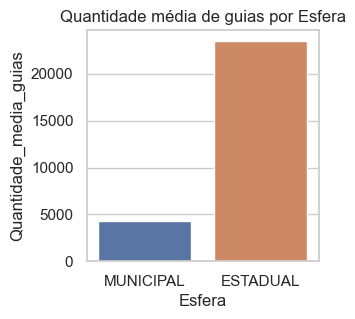

In [61]:
#quantidade_guias por esfera
#df_estados = df_pd_consolid.query("Esfera == 'ESTADUAL'")
#df_municipios = df_pd_consolid.query("Esfera == 'MUNICIPAL'")
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (3, 3))
fig5 = sns.barplot(data=df_pd_consolid, x="Esfera", y="Quantidade_media_guias", errorbar=None)
#fig5.set_yscale("log")
fig5.set_title('Quantidade média de guias por Esfera')

**Variável 6** \
Nome da Variável: Volume_arrecadado \
Descrição: volume em reais arrecadado

In [62]:
# Divide em percentis
df_pd_consolid['Volume_medio_arrecadado'].describe(percentiles = [0.5,0.75,0.995])

count       3360.00
mean      108193.53
std      1494175.65
min            0.00
50%         7396.09
75%        25980.25
99.5%    2687473.72
max     69478165.00
Name: Volume_medio_arrecadado, dtype: float64

In [63]:
# Filtra por valores iguais ou menores que 25980.25
tmp = df_pd_consolid[df_pd_consolid['Volume_medio_arrecadado'] <= 25980.25]

Text(0.5, 1.0, 'Histograma de Volume médio arrecadado')

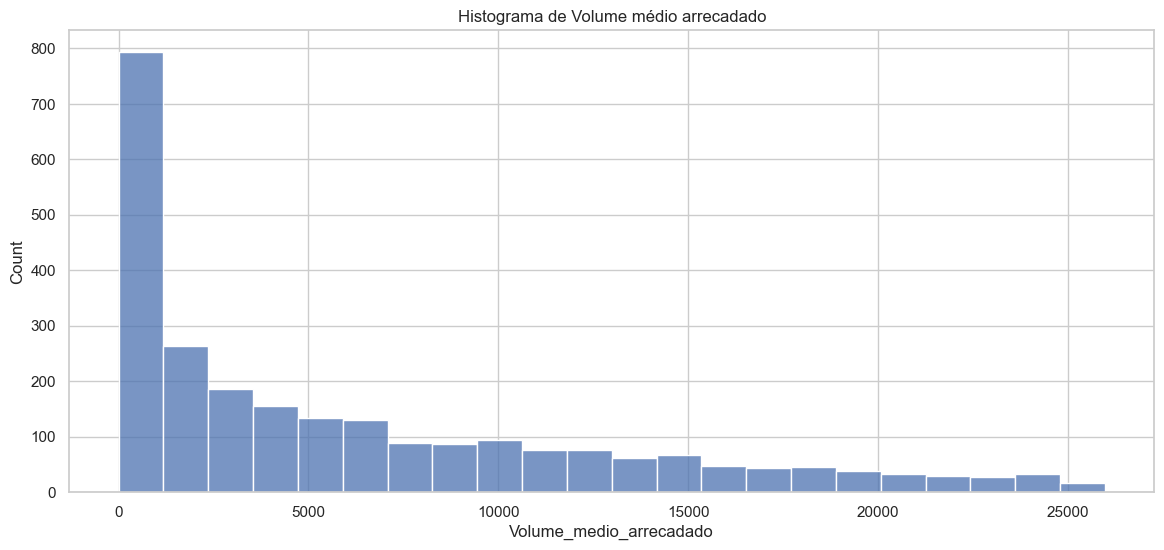

In [64]:
# Visualização da variável 6
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig6 = sns.histplot(tmp['Volume_medio_arrecadado'], kde = False, bins = 22)
#fig5.set_yscale('log', basey = 2)
fig6.set_title('Histograma de Volume médio arrecadado')

Text(0.5, 1.0, 'Volume médio arrecadado por tipo_cart')

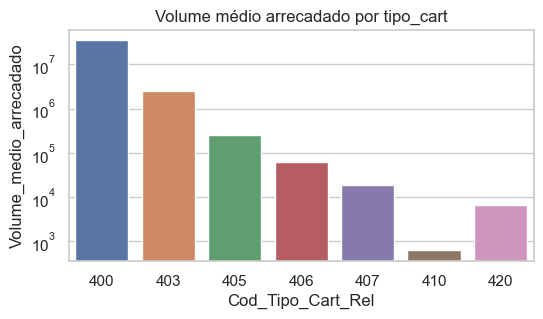

In [65]:
#Volume_arrecadado por tipo_cart
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 3))
fig7 = sns.barplot(data=df_pd_consolid, x="Cod_Tipo_Cart_Rel", y="Volume_medio_arrecadado", errorbar=None)
fig7.set_yscale('log')
fig7.set_title('Volume médio arrecadado por tipo_cart')

Text(0.5, 1.0, 'Volume médio arrecadado por UF')

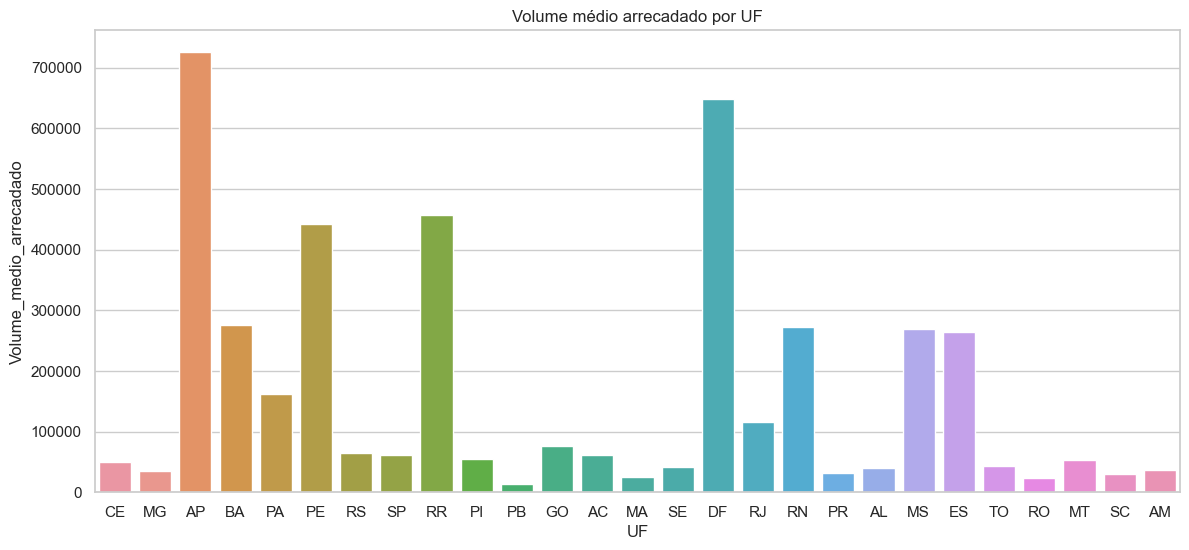

In [67]:
#Volume_arrecadado por UF
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig8 = sns.barplot(data=df_pd_consolid, x="UF", y="Volume_medio_arrecadado", errorbar=None)
#fig8.set_yscale('log')
fig8.set_title('Volume médio arrecadado por UF')

In [ ]:
# Em termos de volume em reais arrecadado, chama atenção o AP como o mais representativo, nenhuma surpresa para o DF, 
# depois aparecem com valores representativos, em segundo nível, RR e PE, em terceiro nível, MS e ES, agora surpreende
# SP não figurar dentre os mais representativos, é provavel que tenha sofrido com a exclusão de outliers.

In [68]:
#calculando volume médio arrecadado por UF
df_pd_consolid[['UF','Volume_medio_arrecadado']].groupby('UF').mean().round(2).sort_values(by='Volume_medio_arrecadado', ascending = False)

,Volume_medio_arrecadado
UF,
AP,725607.49
DF,649193.33
RR,457387.12
PE,442689.92
BA,275612.26
RN,273274.12
MS,269530.04
ES,264653.02
PA,162244.52


Text(0.5, 1.0, 'Volume_medio_arrecadado por Esfera')

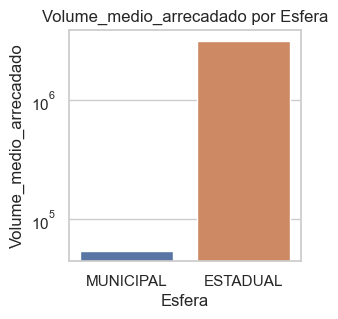

In [69]:
#Volume_arrecadado por Esfera
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (3, 3))
fig9 = sns.barplot(data=df_pd_consolid, x="Esfera", y="Volume_medio_arrecadado", errorbar=None)
fig9.set_yscale('log')
fig9.set_title('Volume_medio_arrecadado por Esfera')

**Variável 7** \
Nome da Variável: Volume_tarifas \
Descrição: volume em reais de tarifas pagas pelo cliente

In [70]:
# Divide em percentis
df_pd_consolid['Volume_medio_tarifas'].describe(percentiles = [0.5,0.75,0.995])

count     3360.00
mean      3617.31
std      14362.61
min          1.00
50%        953.25
75%       2637.62
99.5%    60071.02
max     609748.00
Name: Volume_medio_tarifas, dtype: float64

In [71]:
# Filtra por valores iguais ou menores que 60071.02
tmp = df_pd_consolid[df_pd_consolid['Volume_medio_tarifas'] <= 2637.62]

Text(0.5, 1.0, 'Distribuição de Volume médio de tarifas')

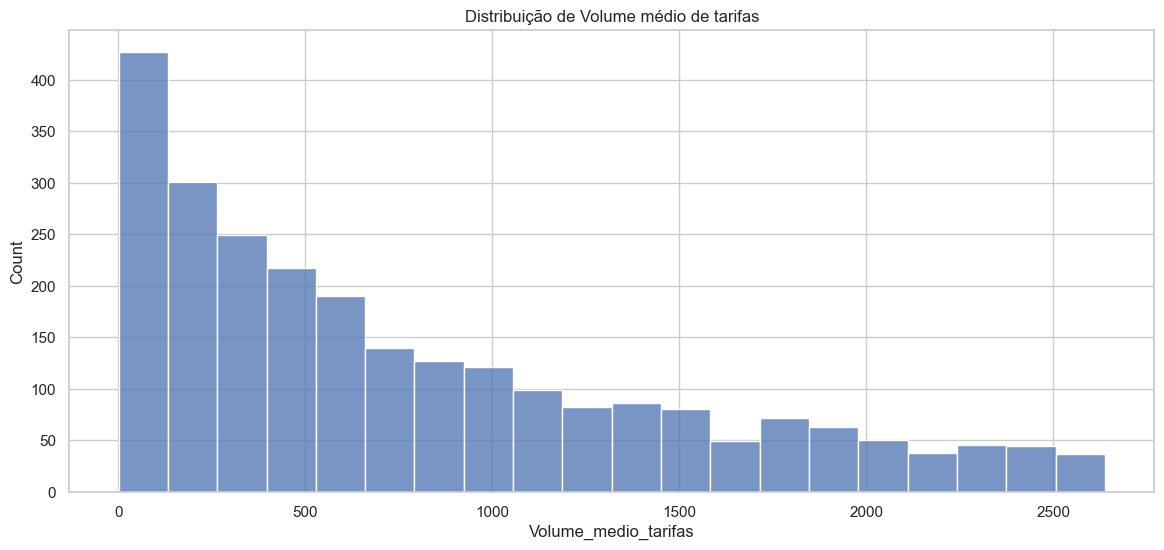

In [72]:
# Visualização da variável 7
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig10 = sns.histplot(tmp['Volume_medio_tarifas'], kde = False, bins = 20)
#fig10.set_yscale('log', basey = 2)
fig10.set_title('Distribuição de Volume médio de tarifas')

Text(0.5, 1.0, 'Volume médio de tarifas por Cod_Tipo_Cart_Rel')

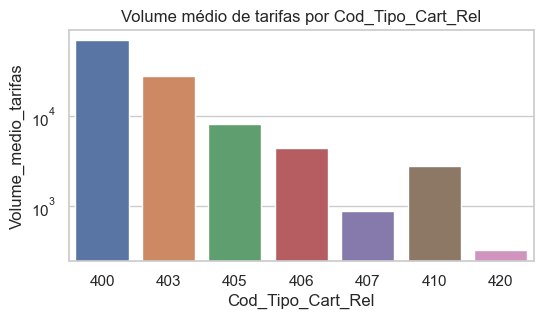

In [73]:
#Volume_tarifas por Cod_Tipo_Cart_Rel
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 3))
fig11 = sns.barplot(data=df_pd_consolid, x="Cod_Tipo_Cart_Rel", y="Volume_medio_tarifas", errorbar=None)
fig11.set_yscale('log')
fig11.set_title('Volume médio de tarifas por Cod_Tipo_Cart_Rel')

Text(0.5, 1.0, 'Volume mpedio de tarifas por UF')

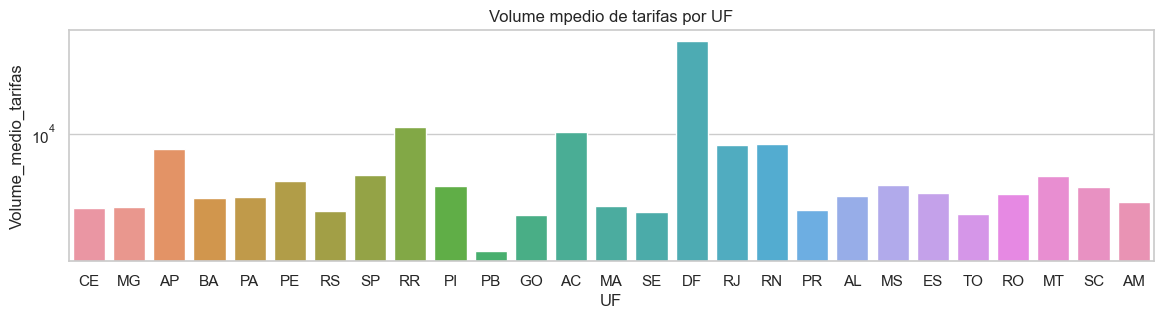

In [74]:
#Volume_tarifas por UF
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 3))
fig12 = sns.barplot(data=df_pd_consolid, x="UF", y="Volume_medio_tarifas", errorbar=None)
fig12.set_yscale('log')
fig12.set_title('Volume mpedio de tarifas por UF')

In [ ]:
# O volume de tarifas mostra o DF como destaque, seguido por AP, AC, RJ e RR, guardando certa relação positiva com a 
#quantidade de guias recebidas, contudo SP apesar de figurar dentre os que mais recebem guias, não aparece dentre os que mais
#geram tarifas para o banco, sugerindo que provavelmente possui tarifa diferenciada.

Text(0.5, 1.0, 'Volume médio de tarifas por Esfera')

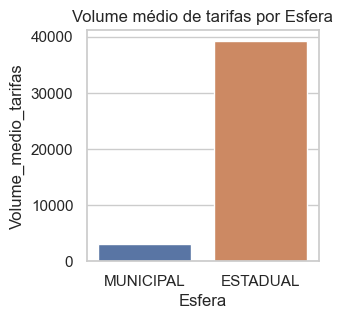

In [75]:
#Volume_tarifas por Esfera
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (3, 3))
fig13 = sns.barplot(data=df_pd_consolid, x="Esfera", y="Volume_medio_tarifas", errorbar=None)
#fig13.set_yscale('log')
fig13.set_title('Volume médio de tarifas por Esfera')

**Variável 8** \
Nome da Variável: Margem_contribuicao \
Descrição: rentabilidade em reais

In [76]:
# Divide em percentis
df_pd_consolid['Margem_contribuicao_media'].describe(percentiles = [0.5,0.75,0.995])

count    3360.00
mean      248.76
std      2246.35
min         0.00
50%         0.00
75%        25.25
99.5%    6181.60
max     82006.00
Name: Margem_contribuicao_media, dtype: float64

In [77]:
# Filtra por valores iguais ou menores que 6181.60
tmp = df_pd_consolid[df_pd_consolid['Margem_contribuicao_media'] <= 6181.60]

Text(0.5, 1.0, 'Distribuição de Margem de Contribuicao Média')

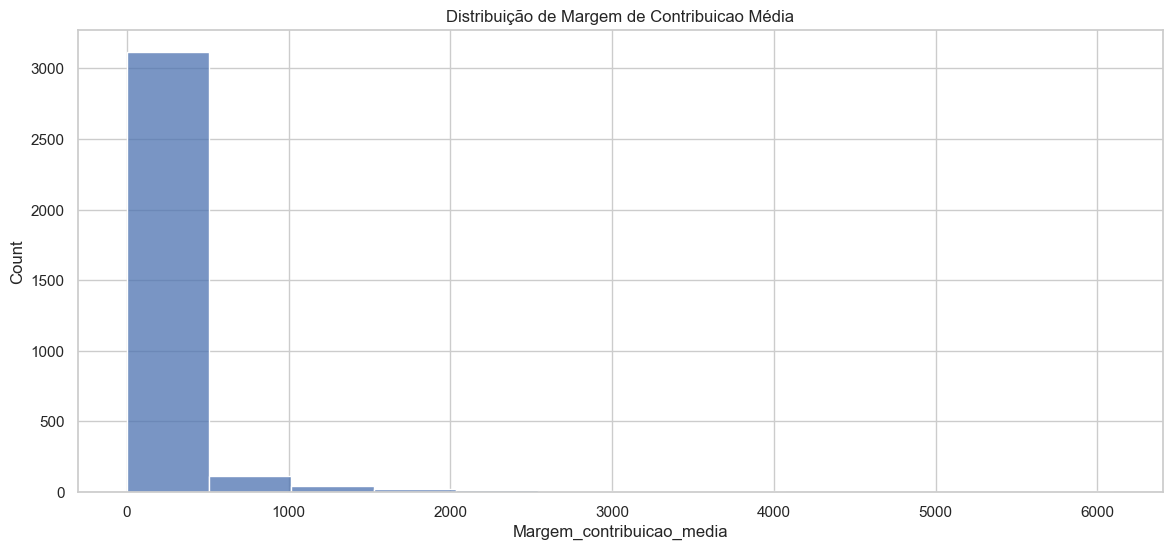

In [78]:
# Visualização da variável 8
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 6))
fig14 = sns.histplot(tmp['Margem_contribuicao_media'], kde = False, bins = 12)
#fig14.set_yscale('log', basey = 2)
fig14.set_title('Distribuição de Margem de Contribuicao Média')

Text(0.5, 1.0, 'Margem de Contribuição Média por Cod_Tipo_Cart_Rel')

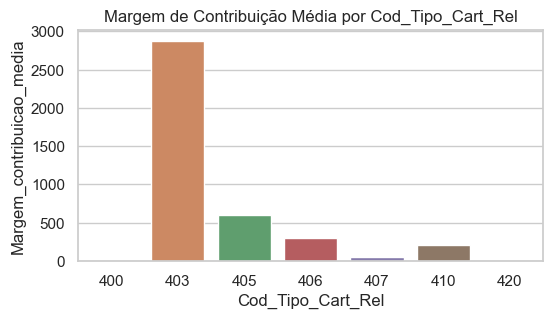

In [79]:
#Margem_contribuicao por tipo_cart
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 3))
fig15 = sns.barplot(data=df_pd_consolid, x="Cod_Tipo_Cart_Rel", y="Margem_contribuicao_media", errorbar=None)
#fig15.set_yscale('log')
fig15.set_title('Margem de Contribuição Média por Cod_Tipo_Cart_Rel')

In [ ]:
# Observa-se que os clientes das carteiras tipo 400, embora tenham apresentado os maiores valores em quantidade de guias
# volume arrecado e volume de tarifas, não apresentaram rentabilidade, sendo as carteiras tipo 403, 405 e 406 as mais rentáveis.

Text(0.5, 1.0, 'Margem de Contribuição Média por UF')

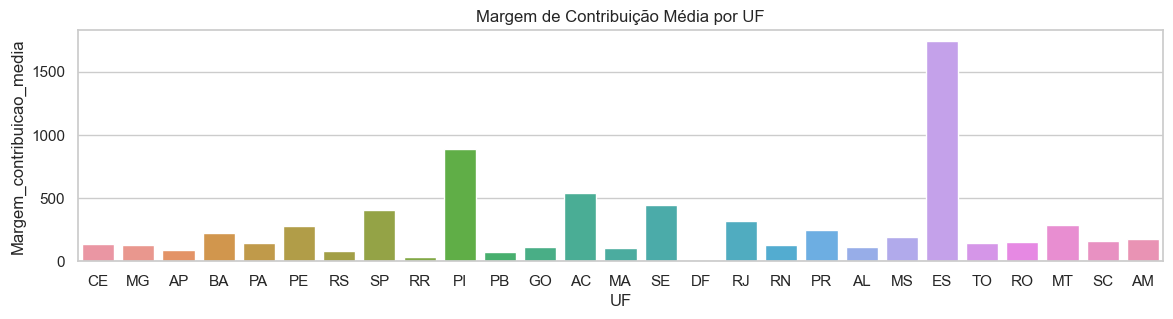

In [80]:
#Margem_contribuicao por UF
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 3))
fig16 = sns.barplot(data=df_pd_consolid, x="UF", y="Margem_contribuicao_media", errorbar=None)
#fig16.set_yscale('log')
fig16.set_title('Margem de Contribuição Média por UF')

In [ ]:
#Na margem de contribuição média dos clientes, destacam-se os Estados do ES e PI, seguidos pelo AC, SE e SP.

Text(0.5, 1.0, 'Margem de Contribuição Média por Esfera')

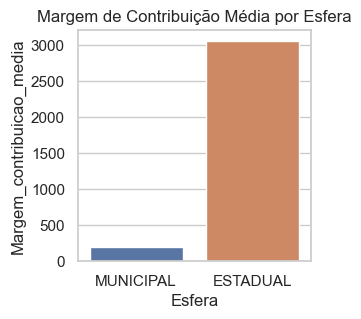

In [81]:
#Margem_contribuicao por Esfera
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (3, 3))
fig17 = sns.barplot(data=df_pd_consolid, x="Esfera", y="Margem_contribuicao_media", errorbar=None)
#fig17.set_yscale('log')
fig17.set_title('Margem de Contribuição Média por Esfera')

**Variável 9** \
Nome da Variável: Tarifa \
Descrição: valor da tarifa por guia recebida em reais

In [82]:
# Divide em percentis
df_pd_consolid['Tarifa_media'].describe(percentiles = [0.5,0.75,0.995])

count   3360.00
mean       0.87
std        0.66
min        0.01
50%        0.74
75%        1.15
99.5%      3.64
max        4.60
Name: Tarifa_media, dtype: float64

In [83]:
# Filtra por valores iguais ou menores que 3.64
tmp = df_pd_consolid[df_pd_consolid['Tarifa_media'] <= 3.64]

Text(0.5, 1.0, 'Histograma de Tarifa Média')

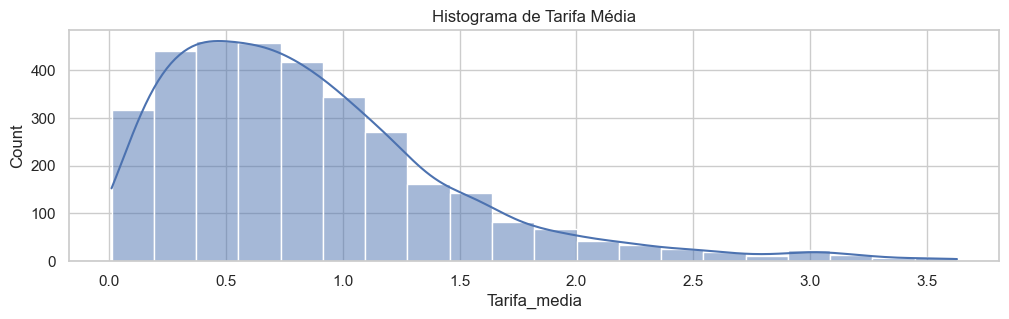

In [84]:
# Visualização da variável 9
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (12, 3))
fig18 = sns.histplot(tmp['Tarifa_media'], kde = True, bins = 20)
fig18.set_title('Histograma de Tarifa Média')

Text(0.5, 1.0, 'Tarifa Média por Cod_Tipo_Cart_Rel')

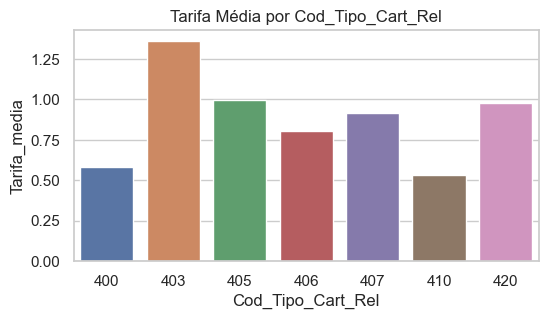

In [85]:
#Tarifa por Cod_Tipo_Cart_Rel
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (6, 3))
fig19 = sns.barplot(data=df_pd_consolid, x="Cod_Tipo_Cart_Rel", y="Tarifa_media", errorbar=None)
#fig19.set_yscale('log')
fig19.set_title('Tarifa Média por Cod_Tipo_Cart_Rel')

Text(0.5, 1.0, 'Tarifa Média por UF')

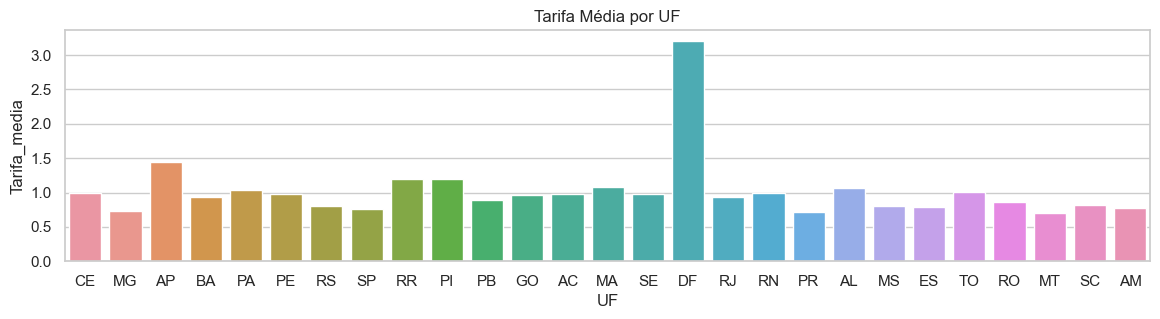

In [86]:
#Tarifa por UF
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (14, 3))
fig20 = sns.barplot(data=df_pd_consolid, x="UF", y="Tarifa_media", errorbar=None)
#fig20.set_yscale('log')
fig20.set_title('Tarifa Média por UF')

Text(0.5, 1.0, 'Tarifa Média por Esfera')

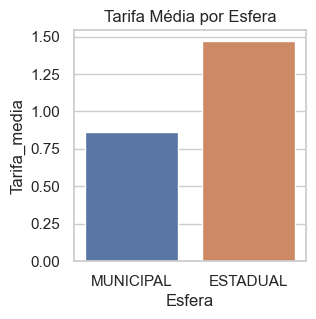

In [87]:
#Tarifa por Esfera
sns.set_theme(style = 'whitegrid')
plt.figure(figsize = (3, 3))
fig21 = sns.barplot(data=df_pd_consolid, x="Esfera", y="Tarifa_media", errorbar=None)
#fig21.set_yscale('log')
fig21.set_title('Tarifa Média por Esfera')

### Analise do gráfico de correlação entre as variáveis

Idealmente queremos alta correlação entre as variáveis de entrada e a variável de saída e baixa correlação entre as variáveis de entrada, analisando o gráfico de correlações entre as variáveis, identificamos:

A variável preditora "Quantidade_guias" apresenta uma leve correlação negativa com a variável alvo "Tarifa", ou seja, quanto maior a quantidade de guias, a tarifa tende a ser menor, o que faz todo sentido.

As variáveis preditoras "Quantidade_guias" e "Volume_tarifas" possuem alta correlação positiva, o que é muito coerente, pois é natural que o volume de tarifas cresça conforme a quantidade de guias aumenta, como as duas variáveis são candidatas a preditoras e não faz sentido para as regras de negócio utilizar o volume de tarifas como variável de entrada, entre as 2 variáveis optamos pela quantidade de guias.

As variáveis "Quantidade_guia" e "Volume_arrecadado", assim como "Quantidade_guia" e "Margem_contribuicao" apresentam leve correlação positiva, dado que o incremento na quantidade de guias potencializa tanto o volume arrecadado, como a rentabilidade, entre as 3 variáveis, descartamos como variável de entrada a margem de contribuição, pois pelo conhecimento de negócio, faz mais sentido como uma possível variável alvo. 

A variável "Volume_arrecadado" não apresenta correlação direta com a variável "Tarifa", contudo é amplamente utilizada pelas área de negócio envolvidas por ser um fator determinante na margem de contribuição (rentabilidade) do negócio, guardando uma relação implícita positiva com o valor da tarifa, devido a remuneração que os bancos obtêm com o float, prazo em dias que o banco retêm os recursos arrecadados antes de disponibilizar para o cliente previsto em contrato, o que fica evidenciado na correlação positiva do volume arrecadado com a variável "Margem_contribuicao".

A correlação positiva do "Volume_arrecadado" com "Volume_tarifas" é óbvia e como não é usual, por questões de razoabilidade utilizar o volume de tarifas como variável de entrada, optamos por escolher o volume arrecadado a nível de estimativa ou expectativa de ser realizado como possível variável preditora dentre essas 2 variáveis, mesma razão pela qual não levamos em consideração a correlação positiva observada de "Volume_tarifas" com a variável alvo "Tarifa".

Logo, vamos continuar a análise exploratória considerando "Quantidade_guias" e "Volume_arrecadado" como potenciais variáveis de entrada e a "Margem_contribuicao" como uma possível segunda variável alvo depois da "Tarifa", podendo ser construído um modelo de regressão linear múltipla com 2 variáveis alvo posteriormente. 


    



<Axes: >

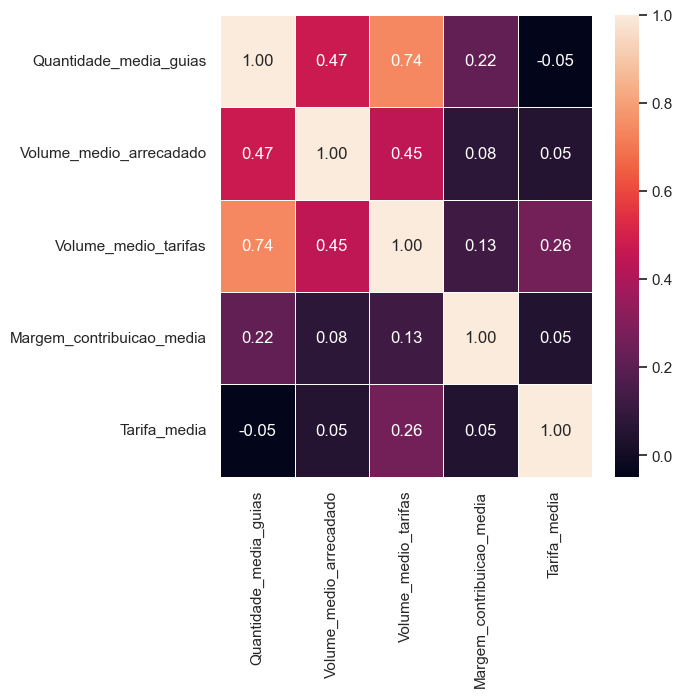

In [88]:
# Heatmap para visualizar a correlação
corr = df_pd_consolid.corr()
f,ax = plt.subplots(figsize = (6, 6))
sns.heatmap(corr, annot = True, linewidths = .5, fmt = '.2f', ax = ax)

<Axes: >

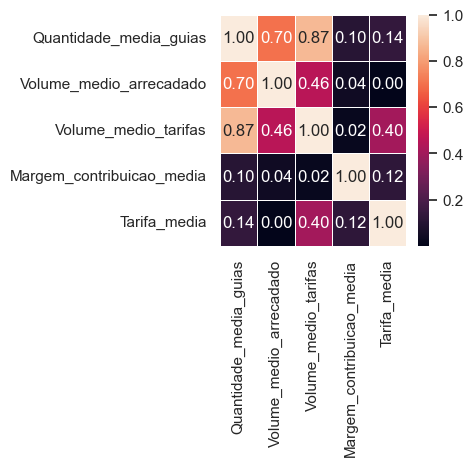

In [89]:
# Heatmap para visualizar a correlação
df_estadual = df_pd_consolid[df_pd_consolid['Esfera'] == "ESTADUAL"]
corr = df_estadual.corr()
f,ax = plt.subplots(figsize = (3, 3))
sns.heatmap(corr, annot = True, linewidths = .5, fmt = '.2f', ax = ax)

<Axes: >

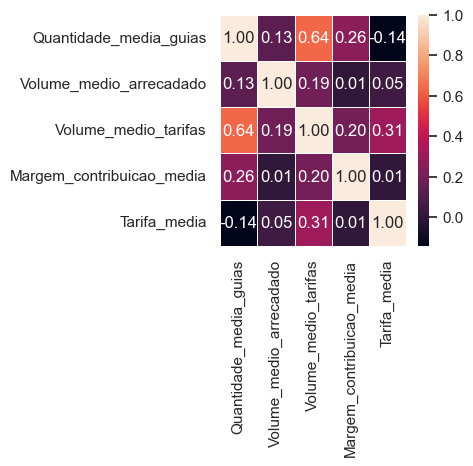

In [90]:
# Heatmap para visualizar a correlação
df_municipal = df_pd_consolid[df_pd_consolid['Esfera'] == "MUNICIPAL"]
corr = df_municipal.corr()
f,ax = plt.subplots(figsize = (3, 3))
sns.heatmap(corr, annot = True, linewidths = .5, fmt = '.2f', ax = ax)

In [91]:
# Obtendo os valores individuais para usar nos gráficos
tipoCart = df_pd_consolid["Cod_Tipo_Cart_Rel"].values.tolist()
qtde = df_pd_consolid["Quantidade_media_guias"].values.tolist()
volume = df_pd_consolid["Volume_medio_arrecadado"].values.tolist()
tarifas = df_pd_consolid["Volume_medio_tarifas"].values.tolist()
rentab = df_pd_consolid["Margem_contribuicao_media"].values.tolist()
tfa = df_pd_consolid["Tarifa_media"].values.tolist()

<Figure size 1200x500 with 0 Axes>

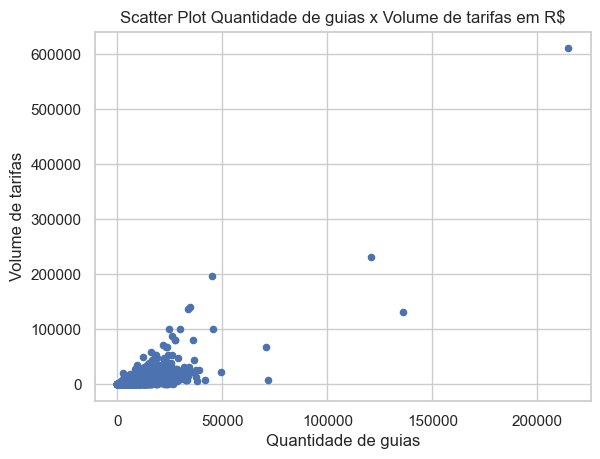

In [92]:
# Scatter Plot Quantidade x Volume de tarifas
#comprovamos uma leve correlação positiva, conforme a quantidade aumenta, o volume vai aumentando também
plt.figure(figsize = (12,5))
sns.set(style = 'whitegrid')
df_pd_consolid.plot(kind = 'scatter', x = 'Quantidade_media_guias', y = 'Volume_medio_tarifas')
plt.xlabel('Quantidade de guias')            
plt.ylabel('Volume de tarifas')
plt.title('Scatter Plot Quantidade de guias x Volume de tarifas em R$') 
plt.show()

<Figure size 1200x600 with 0 Axes>

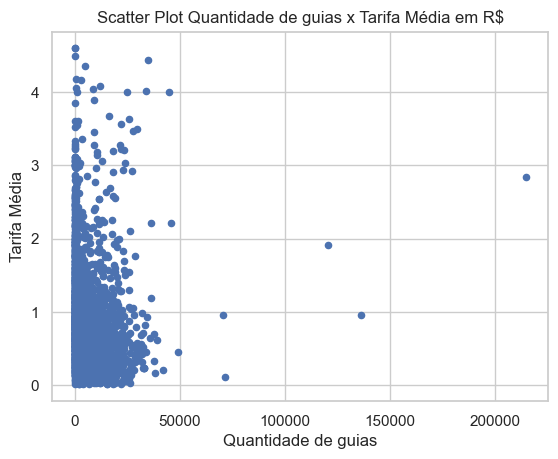

In [93]:
# Scatter Plot Quantidade x Tarifa
#comprovamos uma leve correlação positiva, conforme a quantidade aumenta, o volume vai aumentando também
plt.figure(figsize = (12,6))
sns.set(style = 'whitegrid')
df_pd_consolid.plot(kind = 'scatter', x = 'Quantidade_media_guias', y = 'Tarifa_media')
plt.xlabel('Quantidade de guias')            
plt.ylabel('Tarifa Média')
plt.title('Scatter Plot Quantidade de guias x Tarifa Média em R$') 
plt.show()

<Figure size 1200x600 with 0 Axes>

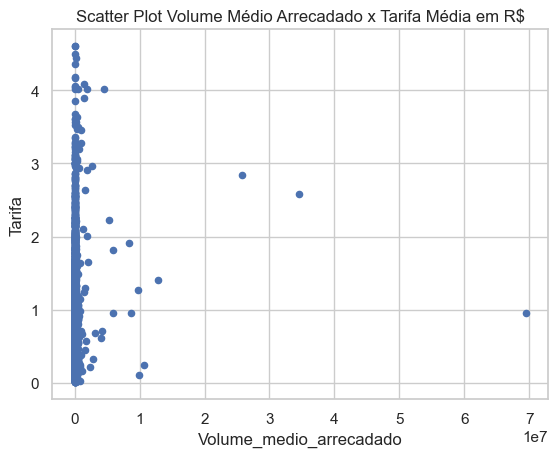

In [94]:
# Scatter Plot Volume x Tarifa
#comprovamos uma leve correlação positiva, conforme a quantidade aumenta, o volume vai aumentando também
plt.figure(figsize = (12,6))
sns.set(style = 'whitegrid')
df_pd_consolid.plot(kind = 'scatter', x = 'Volume_medio_arrecadado', y = 'Tarifa_media')
plt.xlabel('Volume_medio_arrecadado')            
plt.ylabel('Tarifa')
plt.title('Scatter Plot Volume Médio Arrecadado x Tarifa Média em R$') 
plt.show()

In [95]:
df_pd_consolid.to_csv('df_pd_analise_exploratoria_vf.csv', index=False)

# Fim